<a href="https://colab.research.google.com/github/jlxndro/sub_dataanalyst/blob/main/Proyek_Analisis_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** John Alessandro Jong
- **Email:** alessandrojong@gmail.com
- **ID Dicoding:** jlxndro

## Menentukan Pertanyaan Bisnis

- Bagaimana perbedaan jumlah pesepeda dari working day, weekend, dan holiday?
- Kapan waktu terbaik dalam sehari untuk bersepeda?
- Kapan musim terbaik untuk bersepeda?
- Bagaimana cuaca mempengaruhi jumlah orang yang bersepeda?

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Data Wrangling

### Gathering Data

In [2]:
hour_df = pd.read_csv("/content/hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [3]:
day_df = pd.read_csv("/content/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


**Insight:**
- Data hour.csv dan day.csv memiliki format nilai yang sulit dibaca, jika dibaca tanpa keterangan.
- hour.csv memiliki data berbasis jam dan day.csv berbasis hari, hanya terdapat satu perbedaan fitur dari kedua dataset dimana hour.csv memiliki fitur hr (jam)

### Assessing Data

Asesmen Data Hour

In [4]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [5]:
hour_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


In [6]:
hour_df.duplicated().sum()

0

In [7]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


Asesmen Data Day

In [8]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [9]:
day_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [10]:
day_df.duplicated().sum()

0

In [11]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


**Insight:**
- hour.csv dan day.csv cukup lengkap dan bersih, karena kedua dataset ini tidak memiliki missing value ataupun duplicated value
- Terdapat kesalahan tipe data pada kolom **dteday** yang seharusnya memiliki tipe data datetime
- Format nilai data dalam kedua data sulit dipahami

### Cleaning Data

Cleaning Data Hour

In [12]:
hour_df["dteday"] = pd.to_datetime(hour_df["dteday"])
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

Membuat dataframe baru yang dinamakan **hour_clean_df** dimana ada perubahan nama kolom dan perubahan nilai numerik representasi menjadi nilai yang direpresentasi.

In [13]:
hour_clean_df = pd.DataFrame()

hour_clean_df["instant"] = hour_df["instant"]

hour_clean_df["date"] = hour_df["dteday"]

hour_clean_df["season"] = pd.Categorical(hour_df["season"].map({
    1: "Spring",
    2: "Summer",
    3: "Fall",
    4: "Winter"
}))

hour_clean_df["year"] = pd.Categorical(hour_df["yr"].map({
    0: "2011",
    1: "2012"
}))

hour_clean_df["month"] = pd.Categorical(hour_df["mnth"].map({
    1: "Jan",
    2: "Feb",
    3: "Mar",
    4: "Apr",
    5: "May",
    6: "Jun",
    7: "Jul",
    8: "Aug",
    9: "Sep",
    10: "Oct",
    11: "Nov",
    12: "Dec"
}))

hour_clean_df["hour"] = hour_df["hr"]

hour_clean_df["holiday"] = pd.Categorical(hour_df["holiday"].map({
    0: "No",
    1: "Yes"
}))

# Karena data berasal dari USA, maka hari pertama dalam seminggu adalah Hari Minggu
hour_clean_df["weekday"] = pd.Categorical(hour_df["weekday"].map({
    0: "Sun",
    1: "Mon",
    2: "Tue",
    3: "Wed",
    4: "Thu",
    5: "Fri",
    6: "Sat"
}))

hour_clean_df["workingday"] = pd.Categorical(hour_df["workingday"].map({
    0: "No",
    1: "Yes"
}))

hour_clean_df["weather"] = pd.Categorical(hour_df["weathersit"].map({
    1: "Clear, Partly cloudy",
    2: "Misty, Cloudy",
    3: "Little snow/rain",
    4: "Heavy weather"
}))

# n for normalized
hour_clean_df["n_temp"] = hour_df["temp"]
hour_clean_df["n_atemp"] = hour_df["atemp"]
hour_clean_df["n_humidity"] = hour_df["hum"]
hour_clean_df["n_windspeed"] = hour_df["windspeed"]
hour_clean_df["casual"] = hour_df["casual"]
hour_clean_df["registered"] = hour_df["registered"]
hour_clean_df["total"] = hour_df["cnt"]
hour_clean_df.head()

,instant,date,season,year,month,hour,holiday,weekday,workingday,weather,n_temp,n_atemp,n_humidity,n_windspeed,casual,registered,total
0,1,2011-01-01,Spring,2011,Jan,0,No,Sat,No,"Clear, Partly cloudy",0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,Spring,2011,Jan,1,No,Sat,No,"Clear, Partly cloudy",0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,Spring,2011,Jan,2,No,Sat,No,"Clear, Partly cloudy",0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,Spring,2011,Jan,3,No,Sat,No,"Clear, Partly cloudy",0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,Spring,2011,Jan,4,No,Sat,No,"Clear, Partly cloudy",0.24,0.2879,0.75,0.0,0,1,1


In [14]:
hour_clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   instant      17379 non-null  int64         
 1   date         17379 non-null  datetime64[ns]
 2   season       17379 non-null  category      
 3   year         17379 non-null  category      
 4   month        17379 non-null  category      
 5   hour         17379 non-null  int64         
 6   holiday      17379 non-null  category      
 7   weekday      17379 non-null  category      
 8   workingday   17379 non-null  category      
 9   weather      17379 non-null  category      
 10  n_temp       17379 non-null  float64       
 11  n_atemp      17379 non-null  float64       
 12  n_humidity   17379 non-null  float64       
 13  n_windspeed  17379 non-null  float64       
 14  casual       17379 non-null  int64         
 15  registered   17379 non-null  int64         
 16  tota

Simpan dataframe **hour_clean_df** menjadi file CSV untuk pemakaian selanjutnya.

In [15]:
hour_clean_df.to_csv("hour_cleaned.csv", index=False)

Cleaning Data Day

In [16]:
day_df["dteday"] = pd.to_datetime(day_df["dteday"])
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

Membuat dataframe baru yang dinamakan **day_clean_df** dimana ada perubahan nama kolom dan perubahan nilai numerik representasi menjadi nilai yang direpresentasi.

In [17]:
day_clean_df = pd.DataFrame()

day_clean_df["instant"] = day_df["instant"]

day_clean_df["date"] = day_df["dteday"]

day_clean_df["season"] = pd.Categorical(day_df["season"].map({
    1: "Spring",
    2: "Summer",
    3: "Fall",
    4: "Winter"
}))

day_clean_df["year"] = pd.Categorical(day_df["yr"].map({
    0: "2011",
    1: "2012"
}))

day_clean_df["month"] = pd.Categorical(day_df["mnth"].map({
    1: "Jan",
    2: "Feb",
    3: "Mar",
    4: "Apr",
    5: "May",
    6: "Jun",
    7: "Jul",
    8: "Aug",
    9: "Sep",
    10: "Oct",
    11: "Nov",
    12: "Dec"
}))

day_clean_df["holiday"] = pd.Categorical(day_df["holiday"].map({
    0: "No",
    1: "Yes"
}))

# Karena data berasal dari USA, maka hari pertama dalam seminggu adalah Hari Minggu
day_clean_df["weekday"] = pd.Categorical(day_df["weekday"].map({
    0: "Sun",
    1: "Mon",
    2: "Tue",
    3: "Wed",
    4: "Thu",
    5: "Fri",
    6: "Sat"
}))

day_clean_df["workingday"] = pd.Categorical(day_df["workingday"].map({
    0: "No",
    1: "Yes"
}))

day_clean_df["weather"] = pd.Categorical(day_df["weathersit"].map({
    1: "Clear, Partly cloudy",
    2: "Misty, Cloudy",
    3: "Little snow/rain",
    4: "Heavy weather"
}))

# n for normalized
day_clean_df["n_temp"] = day_df["temp"]
day_clean_df["n_atemp"] = day_df["atemp"]
day_clean_df["n_humidity"] = day_df["hum"]
day_clean_df["n_windspeed"] = day_df["windspeed"]
day_clean_df["casual"] = day_df["casual"]
day_clean_df["registered"] = day_df["registered"]
day_clean_df["total"] = day_df["cnt"]
day_clean_df.head(7)

,instant,date,season,year,month,holiday,weekday,workingday,weather,n_temp,n_atemp,n_humidity,n_windspeed,casual,registered,total
0,1,2011-01-01,Spring,2011,Jan,No,Sat,No,"Misty, Cloudy",0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,Spring,2011,Jan,No,Sun,No,"Misty, Cloudy",0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,Spring,2011,Jan,No,Mon,Yes,"Clear, Partly cloudy",0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,Spring,2011,Jan,No,Tue,Yes,"Clear, Partly cloudy",0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,Spring,2011,Jan,No,Wed,Yes,"Clear, Partly cloudy",0.226957,0.229270,0.436957,0.186900,82,1518,1600
5,6,2011-01-06,Spring,2011,Jan,No,Thu,Yes,"Clear, Partly cloudy",0.204348,0.233209,0.518261,0.089565,88,1518,1606
6,7,2011-01-07,Spring,2011,Jan,No,Fri,Yes,"Misty, Cloudy",0.196522,0.208839,0.498696,0.168726,148,1362,1510


In [18]:
day_clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   instant      731 non-null    int64         
 1   date         731 non-null    datetime64[ns]
 2   season       731 non-null    category      
 3   year         731 non-null    category      
 4   month        731 non-null    category      
 5   holiday      731 non-null    category      
 6   weekday      731 non-null    category      
 7   workingday   731 non-null    category      
 8   weather      731 non-null    category      
 9   n_temp       731 non-null    float64       
 10  n_atemp      731 non-null    float64       
 11  n_humidity   731 non-null    float64       
 12  n_windspeed  731 non-null    float64       
 13  casual       731 non-null    int64         
 14  registered   731 non-null    int64         
 15  total        731 non-null    int64         
dtypes: categ

Simpan dataframe **day_clean_df** menjadi file CSV untuk pemakaian selanjutnya.

In [19]:
day_clean_df.to_csv("day_cleaned.csv", index=False)

**Insight:**
- Perubahan nilai pada dataframe hour dan day membuatnya lebih terbaca dan mudah dimengerti.
- Working day merupakan weekdays yang terdiri dari Senin, Selasa, Rabu, Kamis, dan Jumat.

## Exploratory Data Analysis (EDA)

### Perbandingan Working day, Weekend, dan Holiday

Jumlah total pengguna sepeda dalam dua tahun

In [20]:
day_df["cnt"].sum()

3292679

Membagi jenis hari ke beberapa kategori dan menghitung jumlah pengguna berdasarkan tipe hari

In [21]:
day_df["day_type"] = day_df.apply(lambda row: "Holiday" if row["holiday"] == 1 else ("WorkingDay" if row["workingday"] == 1 else "Weekend"), axis=1)
day_df.groupby("day_type")["cnt"].agg(['sum', 'mean'])

,sum,mean
day_type,,
Holiday,78435,3735.000000
Weekend,921834,4389.685714
WorkingDay,2292410,4584.820000


Mengelompokkan jumlah pengguna sepeda berdasarkan hari

In [22]:
day_clean_df.groupby("weekday", observed=False)["total"].agg(['sum','max','min','mean']).sort_values(by="sum", ascending=False)

,sum,max,min,mean
weekday,,,,
Fri,487790,8362,1167,4690.288462
Thu,485395,7804,431,4667.259615
Sat,477807,8714,627,4550.542857
Wed,473048,8173,441,4548.538462
Tue,469109,7767,683,4510.663462
Mon,455503,7525,22,4338.123810
Sun,444027,8227,605,4228.828571


**Insight:**
- Jumlah pengguna sepeda terbanyak ada pada Working Day (hari kerja) dengan total 2.292.410 dan rata-rata 4584.82, diikuti dengan Weekend dan Holiday. Hal ini wajar saja karena working day kira-kira merupakan weekdays dengan 5 hari.
- Jika Working Day dibandingkan dengan Weekend dan dilakukan perhitungan rata-rata jumlah per harinya (Sum Working Day dibagi 5, Sum Weekend dibagi 2), maka rata-rata jumlah akan kurang lebih sama, dengan hari-hari Weekend memiliki rata-rata lebih besar.
- Jumlah pengguna berdasarkan hari diurutkan dari yang terbanyak, adalah Jumat, Kamis, Sabtu, Rabu, Selasa, Senin, dan Minggu.
- Jumlah pengguna yang paling banyak per hari adalah Sabtu dengan 8714 pengguna dan paling sedikit per hari adalah Senin dengan 22 pengguna.

## Waktu Bersepeda Dalam Sehari

Mengelompokkan jumlah pengguna sepeda berdasarkan jam

In [23]:
hour_clean_df.groupby("hour")["total"].agg(['sum','max','min','mean']).sort_values(by="sum", ascending=False)

,sum,max,min,mean
hour,,,,
17,336860,976,15,461.452055
18,309772,977,23,425.510989
8,261001,839,5,359.011004
16,227748,783,11,311.983562
19,226789,743,11,311.523352
13,184919,760,11,253.661180
12,184414,776,3,253.315934
15,183149,750,7,251.233196
14,175652,750,12,240.949246


**Insight:**
- Pengguna sepeda lebih aktif pada sore dan malam hari.
- Setiap jamnya selama 2 tahun paling sedikit ada satu pengguna.

## Musim Terbaik Untuk Bersepeda

Mengelompokkan jumlah pengguna sepeda berdasarkan musim

In [24]:
day_clean_df.groupby("season", observed=False)["total"].agg(['sum','max','min','mean']).sort_values(by="sum", ascending=False)

,sum,max,min,mean
season,,,,
Fall,1061129,8714,1115,5644.303191
Summer,918589,8362,795,4992.331522
Winter,841613,8555,22,4728.162921
Spring,471348,7836,431,2604.132597


Mengelompokkan jumlah pengguna sepeda berdasarkan musim dan tahun dari musim tersebut

In [25]:
day_clean_df.groupby(["season", "year"], observed=False)["total"].agg(['sum','max','min','mean'])

sum   max   min         mean
season year                                 
Fall   2011  419650  6043  1115  4464.361702
       2012  641479  8714  4073  6824.244681
Spring 2011  150000  3239   431  1666.666667
       2012  321348  7836   441  3531.296703
Summer 2011  347316  5805   795  3775.173913
       2012  571273  8362  1027  6209.489130
Winter 2011  326137  5511   627  3664.460674
       2012  515476  8555    22  5791.865169

**Insight:**
- Jumlah pengguna paling banyak ada pada musim gugur, kemudian musim panas, musim dingin, dan musim semi.
- Jumlah pengguna per musim dari tahun 2011 memiliki peningkatan jumlah pengguna.

## Pengaruh Cuaca Terhadap Jumlah Pengguna Sepeda

Mengelompokkan jumlah pengguna berdasarkan kondisi cuaca pada hari itu

In [26]:
day_clean_df.groupby("weather", observed=False)["total"].agg(['sum','max','min','mean']).sort_values(by="sum", ascending=False)

,sum,max,min,mean
weather,,,,
"Clear, Partly cloudy",2257952,8714,431,4876.786177
"Misty, Cloudy",996858,8362,605,4035.862348
Little snow/rain,37869,4639,22,1803.285714


Mengecek data statistik fitur kondisi lingkungan

In [27]:
day_clean_df[["n_temp", "n_atemp", "n_humidity", "n_windspeed", "total"]].describe()

,n_temp,n_atemp,n_humidity,n_windspeed,total
count,731.000000,731.000000,731.000000,731.000000,731.000000
mean,0.495385,0.474354,0.627894,0.190486,4504.348837
std,0.183051,0.162961,0.142429,0.077498,1937.211452
min,0.059130,0.079070,0.000000,0.022392,22.000000
25%,0.337083,0.337842,0.520000,0.134950,3152.000000
50%,0.498333,0.486733,0.626667,0.180975,4548.000000
75%,0.655417,0.608602,0.730209,0.233214,5956.000000
max,0.861667,0.840896,0.972500,0.507463,8714.000000


Menghitung korelasi dari fitur kondisi lingkungan dengan jumlah pengguna

In [28]:
correlation = day_df[["temp", "atemp", "hum", "windspeed", "cnt"]].corr()
print(correlation)

               temp     atemp       hum  windspeed       cnt
temp       1.000000  0.991702  0.126963  -0.157944  0.627494
atemp      0.991702  1.000000  0.139988  -0.183643  0.631066
hum        0.126963  0.139988  1.000000  -0.248489 -0.100659
windspeed -0.157944 -0.183643 -0.248489   1.000000 -0.234545
cnt        0.627494  0.631066 -0.100659  -0.234545  1.000000


**Insight:**
- Cuaca yang paling banyak pengguna sepeda ada pada Clear, Partly cloudy (cerah sedikit berawan), diikuti dengan Misty, Cloudy (berkabut berawan) dan Little snow/rain. Ini merupakan pola yang wajar karena semakin baik cuaca, semakin banyak orang beraktivitas di luar. Itulah mengapa pada cuaca terburuk, tidak ada pengguna biar satu pun.
- Hubungan korelasi temp dan atemp mempengaruhi jumlah pengguna, hum dan windspeed tidak berpengauh.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana perbedaan jumlah pesepeda dari working day, weekend, dan holiday?

Visualisasi tipe hari berdasarkan jumlah pengguna pada tipe hari tersebut

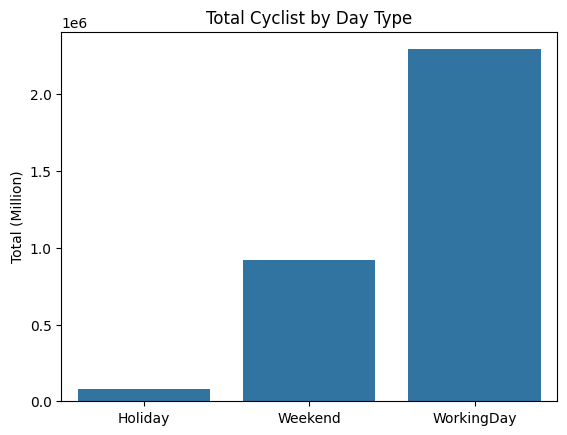

In [29]:
sns.barplot(x='day_type', y='sum', data=day_df.groupby("day_type", observed=False)["cnt"].agg(['sum']))
plt.title('Total Cyclist by Day Type')
plt.xlabel('')
plt.ylabel('Total (Million)')
plt.show()

Visualisasi jumlah total pengguna per hari

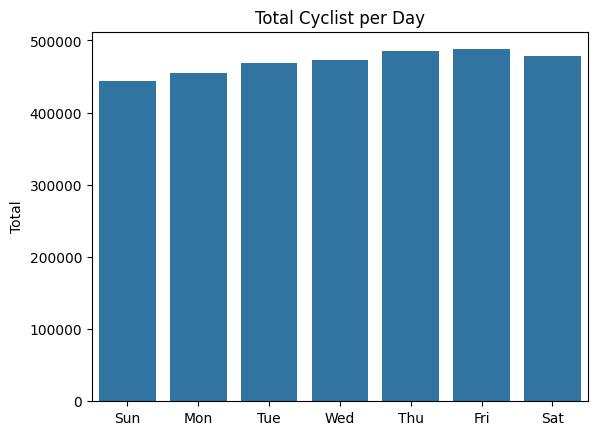

In [30]:
day_order = ['Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat']
day_clean_df['weekday'] = pd.Categorical(day_clean_df['weekday'], categories=day_order, ordered=True)
sns.barplot(x='weekday', y='sum', data=day_clean_df.groupby("weekday", observed=False)["total"].agg(['sum']))
plt.title('Total Cyclist per Day')
plt.xlabel('')
plt.ylabel('Total')
plt.show()

### Pertanyaan 2: Kapan waktu terbaik dalam sehari untuk bersepeda?

Visualisasi jumlah total pengguna per jam

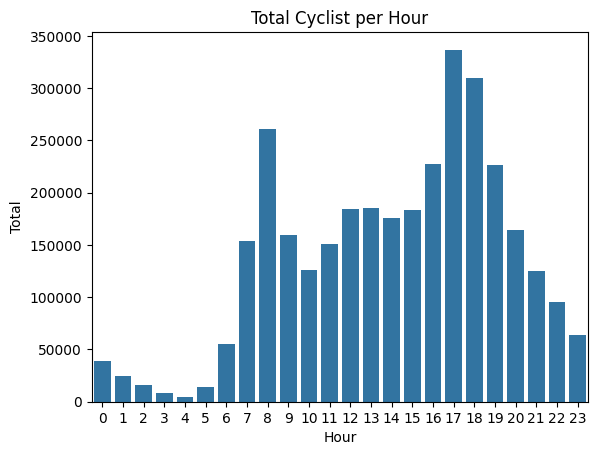

In [31]:
sns.barplot(x='hour', y='sum', data=hour_clean_df.groupby("hour")["total"].agg(['sum']))
plt.title('Total Cyclist per Hour')
plt.xlabel('Hour')
plt.ylabel('Total')
plt.show()

### Pertanyaan 3: Kapan musim terbaik untuk bersepeda?

Visualisasi jumlah total pengguna per musim

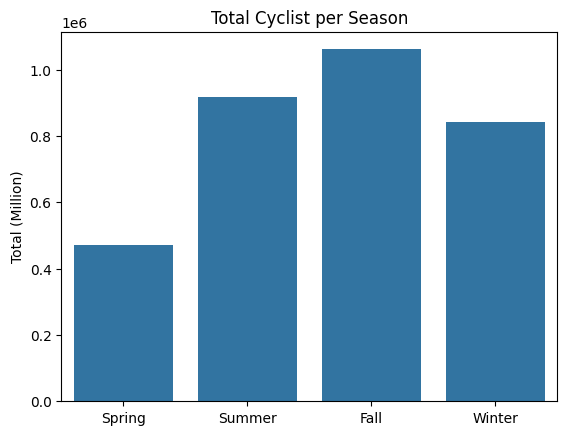

In [32]:
season_order = ['Spring', 'Summer', 'Fall', 'Winter']
day_clean_df['season'] = pd.Categorical(day_clean_df['season'], categories=season_order, ordered=True)
sns.barplot(x='season', y='sum', data=day_clean_df.groupby("season", observed=False)["total"].agg(['sum']))
plt.title('Total Cyclist per Season')
plt.xlabel('')
plt.ylabel('Total (Million)')
plt.show()

Visualisasi jumlah pengguna pada tiap musim per tahun

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


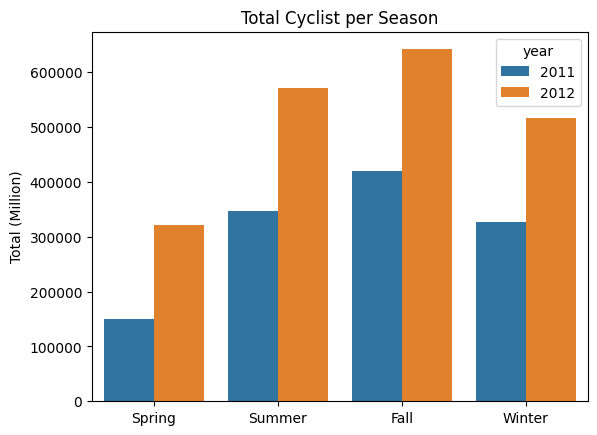

In [33]:
sns.barplot(x='season', y='sum', hue='year', data=day_clean_df.groupby(["season", "year"], observed=False)["total"].agg(['sum']))
plt.title('Total Cyclist per Season')
plt.xlabel('')
plt.ylabel('Total (Million)')
plt.show()

Visualisasi perbandingan jumlah pengguna pada tiap musim per tahun

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


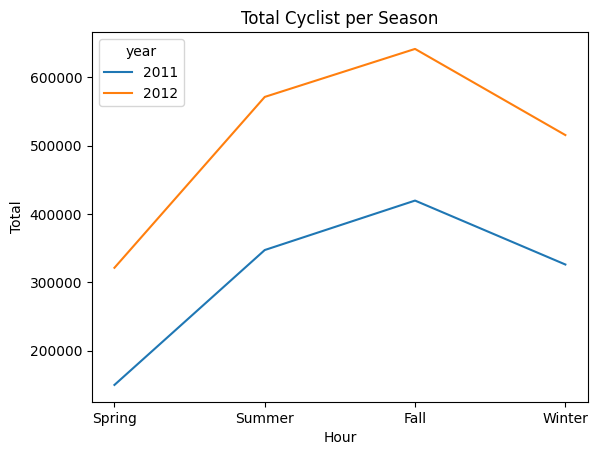

In [34]:
sns.lineplot(x='season', y='sum', hue='year', data=day_clean_df.groupby(["season", "year"], observed=False)["total"].agg(['sum']))
plt.title('Total Cyclist per Season')
plt.xlabel('Hour')
plt.ylabel('Total')
plt.show()

### Pertanyaan 4: Bagaimana cuaca mempengaruhi jumlah orang yang bersepeda?

Visualisasi jumlah pengguna berdasarkan keadaan cuaca

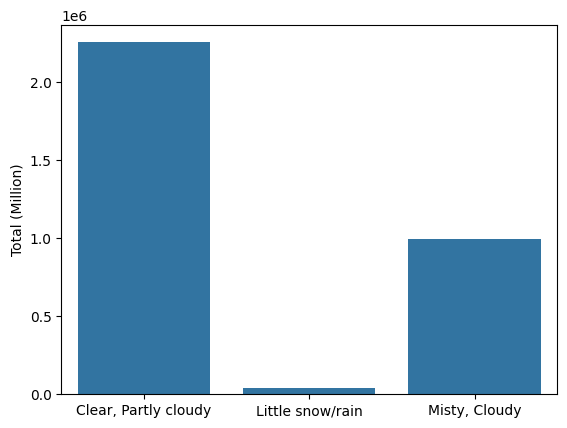

In [35]:
sns.barplot(x='weather', y='sum', data=day_clean_df.groupby("weather", observed=False)["total"].agg(['sum']))
plt.xlabel('')
plt.ylabel('Total (Million)')
plt.show()

Visualisasi korelasi keadaan lingkungan dengan jumlah pengguna menggunakan heatmap

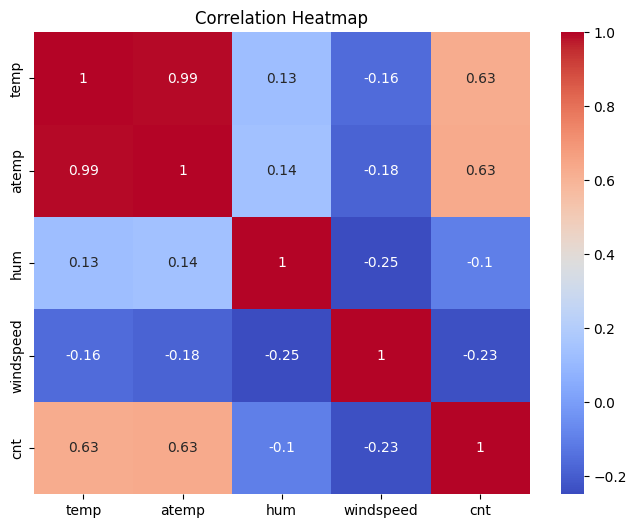

In [36]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

**Insight:**
- Total pengguna sepeda terbanyak ada pada working day, kemudian weekend, dan holiday. Weekend dan working day memiliki kisaran rata-rata yang sama. Hal ini dibuktikan jumlah pengguna setiap harinya hampir sama, dengan Jumat terbanyak dan Minggu tersedikit.
- Berdasarkan jam, pagi memiliki peningkatan tapi langsung turun dan naik kembali pada sore menjelang malam.
- Musim dengan jumlah pengguna terbanyak adalah musim gugur, diikuti dengan musim panas dan musim dingin. Musim semi memiliki jumlah paling sedikit. Perbedaan tahun mengikuti tren yang sama, namun tahun 2012 memiliki jumlah pengguna yang lebih banyak.
- Cuaca yang baik memiliki pengguna yang banyak, semakin jelek cuaca, semakin sedikit pengguna. Dalam kondisi cuaca berat, tidak ada pengguna yang tercatat. Suhu mempengaruhi jumlah pengguna, kelembapan dan kecepatan angin tidak mempengaruhi.

## Conclusion

- Conclusion pertanyaan 1: Perbandingan jika melihat tipe hari working day memiliki jumlah pengguna sepeda terbanyak, diikuti dengan weekend dan holiday. Perlu diingat bahwa working day terdiri dari 5 hari (Senin-Jumat), weekend terdiri dari 2 hari saja (Sabtu dan Minggu), dan holiday tergantung dengan tanggal liburan. Hasil yang didapat wajar, namun jika kita mencari rata-rata per hari (dibagi dengan jumlah hari), maka rata-rata weekend lebih besar dari working day. Hal ini berarti banyak pengguna pada weekend maupun working day.
- Conclusion pertanyaan 2: Rentang jumlah pengguna dalam jam per hari didonimasi pada sore menjelang malam. Namun, ada jumlah yang cukup tinggi pada pagi jam 8. Kita bisa menarik kesimpulan bahwa untuk pagi, pengguna merupakan seseorang yang berolahraga. Dan lebih banyak pengguna pada sore dan malam karena siang hari relatif lebih panas daripada sore dan malam hari.
- Conclusion pertanyaan 3: Musim terbaik untuk bersepeda adalah musim gugur, musim panas kedua, musim dingin ketiga. Musim semi memiliki jumlah pengguna yang lebih sedikit dibandingkan dengan musim lainnya. Pola pengguna untuk tahun 2011 sama dengan 2012, namun dari tahun 2011 ke 2012, terdapat peningkatan jumlah pengguna.
- Conclusion pertanyaan 4: Cuaca sangat mempengaruhi jumlah pengguna sepeda, cuaca yang lebih bagus memiliki jumlah pengguna yang lebih tinggi. Sekitaran 60% pengguna ada pada hari yang cerah, sisanya di hari yang agak berawan dan sedikit pada hari yang hujan/salju ringan. Pada cuaca yang berat, tidak terdapat pengguna satupun. Suhu berpengaruh pada jumlah pengguna, sedangkan kelembapan dan kecepatan angin tidak memiliki pengaruh.